**Import Libraries**

In [61]:
import matplotlib.pyplot as plt
import numpy as np

**Define Parameters**

In [62]:
# Define models
models = [
    "DenseNet121", "ConvNeXt v2", "Swin v2", 
    "CoAtNet", "MaxViT", "VMamba", 
    "MambaVision-L", "MambaVision-T2"
]

**Plot Baseline vs. Baseline without TTA**

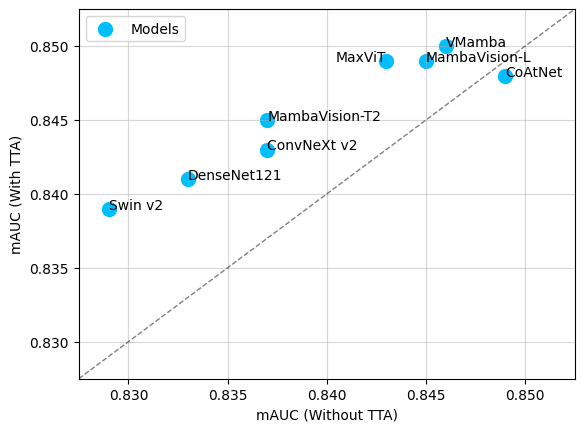

In [63]:
# The results
results_with_tta = [0.841, 0.843, 0.839, 0.848, 0.849, 0.850, 0.849, 0.845]
results_without_tta = [0.833, 0.837, 0.829, 0.849, 0.843, 0.846, 0.845, 0.837]

# Create scatter plot
plt.figure()
plt.scatter(results_without_tta, results_with_tta, label='Models', marker='o', color='deepskyblue',s=100)

# Create a diagonal line
plt.plot(
    [0.8275, 0.8525], [0.8275, 0.8525],
    linestyle='--',
    color='black',
    linewidth=1,
    alpha=0.5
)

# Annotate with model name
for x, y, label in zip(results_without_tta, results_with_tta, models):
    if label == "MaxViT":
        plt.text(x, y, label,ha='right')
    else:
        plt.text(x, y, label)

# Decide interval for axis
plt.xlim(0.8275, 0.8525)
plt.ylim(0.8275, 0.8525)

# Plot
plt.xlabel('mAUC (Without TTA)')
plt.ylabel('mAUC (With TTA)')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

**Plot Step-by-step Add Augmentations**

/tmp/ipykernel_1554232/3157733632.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


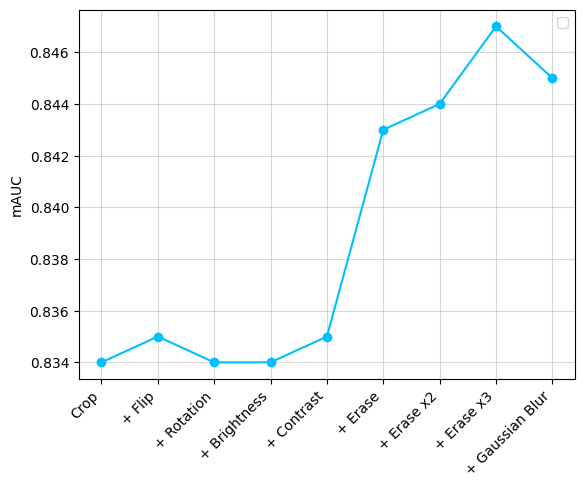

In [64]:
augmentations_steps = [
    "Crop", "+ Flip", "+ Rotation", "+ Brightness",
    "+ Contrast", "+ Erase", "+ Erase x2", "+ Erase x3", "+ Gaussian Blur"
]

# The results
results_augmentations_steps = [0.834, 0.835, 0.834, 0.834, 0.835, 0.843, 0.844, 0.847, 0.845]

plt.plot(range(len(augmentations_steps)), results_augmentations_steps, marker='o', color='deepskyblue')
plt.xticks(range(len(augmentations_steps)), augmentations_steps, rotation=45, ha='right')
plt.ylabel('mAUC')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

**Plot Effect Optimizer**

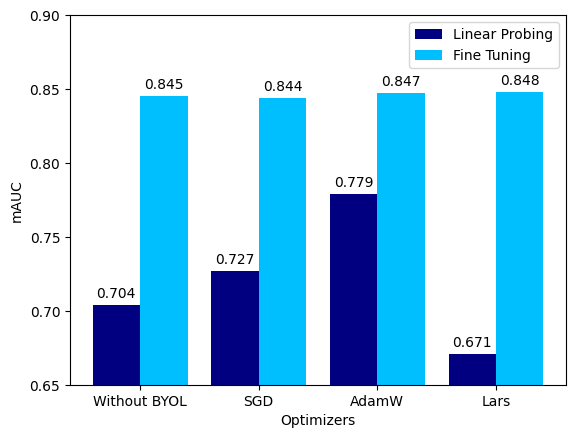

In [65]:
# The results
optimizers = ["Without BYOL", "SGD", "AdamW", "Lars"]
results_linear_probing = [0.704, 0.727, 0.779, 0.671]
results_fine_tuning = [0.845, 0.844, 0.847, 0.848]

# Bar width and indexes
bar_width = 0.4
indexes = np.array([0,1,2,3])


# Plotting with value annotations
bars1 = plt.bar(indexes, results_linear_probing, bar_width, label='Linear Probing', color='navy')
bars2 = plt.bar(indexes + bar_width, results_fine_tuning, bar_width, label='Fine Tuning', color='deepskyblue')

# Add text on the bars
for i in range(4):
    plt.text(indexes[i], results_linear_probing[i]+0.005, f'{results_linear_probing[i]:.3f}', ha='center')
    plt.text(indexes[i] + bar_width, results_fine_tuning[i]+0.005, f'{results_fine_tuning[i]:.3f}', ha='center')

# Decide interval for axis
plt.ylim(0.65, 0.9)

# Plot
plt.xlabel('Optimizers')
plt.ylabel('mAUC')
plt.xticks(indexes + bar_width / 2, optimizers)
plt.legend()
plt.show()

**Plot Baseline vs. BYOL Pre-training**

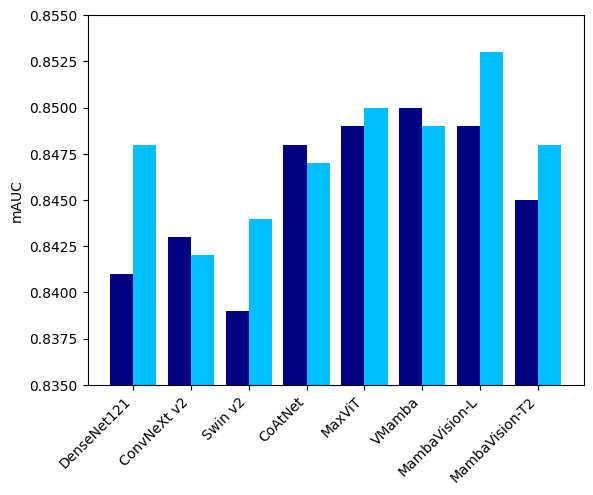

In [66]:
# The results
results_baseline = [0.841, 0.843, 0.839, 0.848, 0.849, 0.850, 0.849, 0.845]
results_byol =     [0.848, 0.842, 0.844, 0.847, 0.850, 0.849, 0.853, 0.848]

# Bar width and indexes
bar_width = 0.4
indexes = np.arange(len(models))

# Plotting with value annotations
bars1 = plt.bar(indexes, results_baseline, bar_width, color='navy')
bars2 = plt.bar(indexes + bar_width, results_byol, bar_width, color='deepskyblue')

# Decide interval for axis
plt.ylim(0.835, 0.855)

# Plot
plt.ylabel('mAUC')
plt.xticks(indexes + bar_width / 2, models, rotation=45, ha='right')
plt.show()

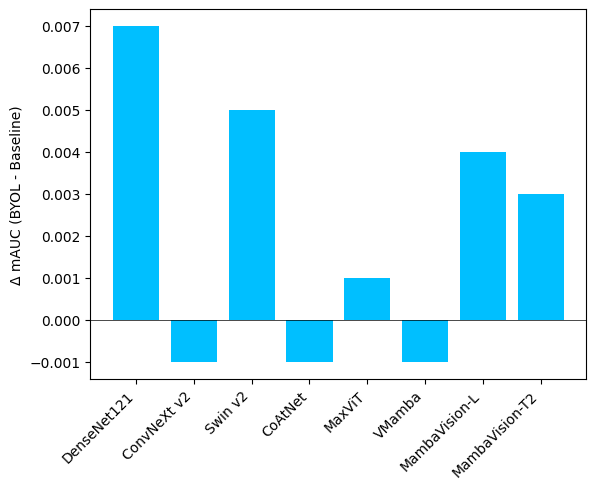

In [67]:
# The results
results_baseline = [0.841, 0.843, 0.839, 0.848, 0.849, 0.850, 0.849, 0.845]
results_byol =     [0.848, 0.842, 0.844, 0.847, 0.850, 0.849, 0.853, 0.848]

# Plot
delta = np.array(results_byol) - np.array(results_baseline)
plt.bar(models, delta, color='deepskyblue')
plt.axhline(0, color='black', linewidth=0.5)
plt.ylabel('Δ mAUC (BYOL - Baseline)')
plt.xticks(rotation=45, ha='right')
plt.show()

**Plot Individual vs. Ensemble Models**

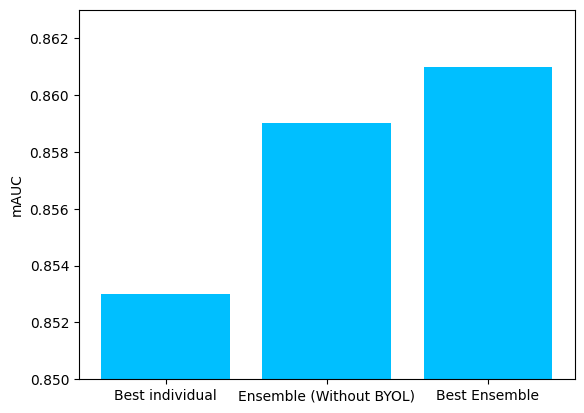

In [68]:
# The results
ensemble_compare_models = ['Best individual','Ensemble (Without BYOL)', 'Best Ensemble']
results_baseline = [0.853, 0.859, 0.861]

# Decide interval for axis
plt.ylim(0.85, 0.863)

# Plot
plt.bar(ensemble_compare_models, results_baseline, color='deepskyblue')
plt.ylabel('mAUC')
plt.show()

**Plot Inference Runtime**

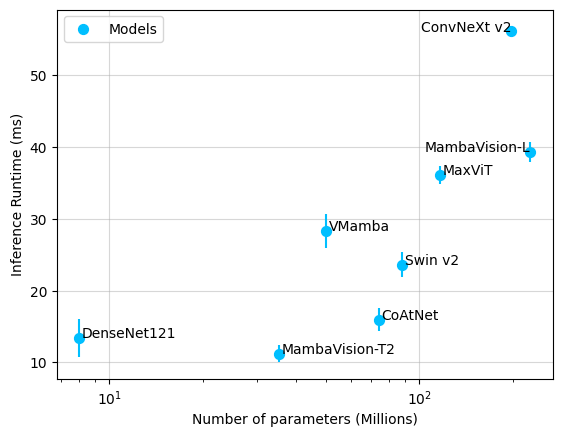

In [69]:
# The results
num_parameters = [8.0, 198.0, 87.9, 73.9, 116.1, 50.0, 227.9, 35.1]
results_runtime_mean = [13.4, 56.1, 23.6, 15.9, 36.1, 28.3, 39.3, 11.2]
results_runtime_std = [2.6, 0.7, 1.7, 1.6, 1.3, 2.4, 1.4, 1.2]

# Create scatter plot
plt.figure()
plt.scatter(num_parameters, results_runtime_mean, label='Models', marker='o', color='deepskyblue',s=50)
plt.errorbar(num_parameters, results_runtime_mean, yerr=results_runtime_std, fmt='o', color='deepskyblue')

# Annotate with model name
for x, y, label in zip(num_parameters, results_runtime_mean, models):
    if label == "ConvNeXt v2" or label == "MambaVision-L":
        plt.text(x, y, label,ha='right')
    else:
        plt.text(x * 1.02, y, label)

# Plot
plt.xlabel('Number of parameters (Millions)')
plt.ylabel('Inference Runtime (ms)')
plt.xscale('log')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

**Plot GPU Memory Usage**

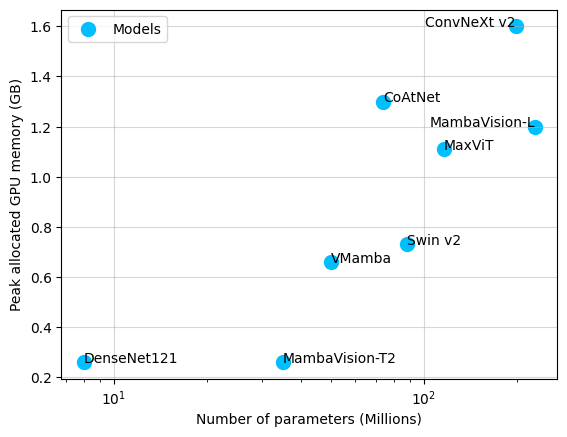

In [70]:
# The results
num_parameters = [8.0, 198.0, 87.9, 73.9, 116.1, 50.0, 227.9, 35.1]
peak_allocated_gpu_memory = [0.26, 1.60, 0.73, 1.30, 1.11, 0.66, 1.20, 0.26]

# Create scatter plot
plt.figure()
plt.scatter(num_parameters, peak_allocated_gpu_memory, label='Models', marker='o', color='deepskyblue',s=100)

# Annotate with model name
for x, y, label in zip(num_parameters, peak_allocated_gpu_memory, models):
    if label == "ConvNeXt v2" or label == "MambaVision-L":
        plt.text(x, y, label,ha='right')
    else:
        plt.text(x, y, label)

# Plot
plt.xlabel('Number of parameters (Millions)')
plt.ylabel('Peak allocated GPU memory (GB)')
plt.xscale('log')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

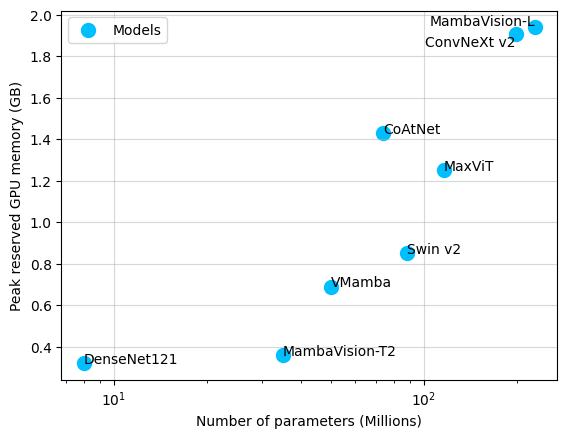

In [71]:
# The results
num_parameters = [8.0, 198.0, 87.9, 73.9, 116.1, 50.0, 227.9, 35.1]
peak_reserved_gpu_memory = [0.32, 1.91, 0.85, 1.43, 1.25, 0.69, 1.94, 0.36]

# Create scatter plot
plt.figure()
plt.scatter(num_parameters, peak_reserved_gpu_memory, label='Models', marker='o', color='deepskyblue',s=100)

# Annotate with model name
for x, y, label in zip(num_parameters, peak_reserved_gpu_memory, models):
    if label == "ConvNeXt v2":
        plt.text(x, y-0.06, label,ha='right')
    elif label == "MambaVision-L":
        plt.text(x, y+0.01, label,ha='right')
    else:
        plt.text(x, y, label)

# Plot
plt.xlabel('Number of parameters (Millions)')
plt.ylabel('Peak reserved GPU memory (GB)')
plt.xscale('log')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

TODO: Need to fix code!!!

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Re-define the data
data = {
    'Model': [
        'DenseNet121', 'ConvNeXt v2', 'Swin v2', 'CoAtNet',
        'MaxViT', 'VMamba', 'MambaVision-L-21K', 'MambaVision-T2'
    ],
    'Runtime': [13.4, 56.1, 23.6, 15.9, 36.1, 28.3, 39.3, 11.2],
    'Throughput': [74, 18, 42, 63, 28, 35, 25, 89],
}

# Generate all four plots
scatter_plot('NumParams', 'Runtime', 'Number of Parameters (Millions)', 'Inference Runtime (ms)', 'Inference Runtime vs Model Size')
scatter_plot('NumParams', 'Throughput', 'Number of Parameters (Millions)', 'Throughput (images/s)', 'Throughput vs Model Size')


NameError: name 'scatter_plot' is not defined